In [12]:
import pandas as pd
data=pd.read_excel("arabaverisi.xlsx")

In [13]:
data.head()


,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          13119 non-null  int64  
 1   price         13119 non-null  int64  
 2   transmission  13119 non-null  object 
 3   mileage       13119 non-null  int64  
 4   tax           13119 non-null  int64  
 5   mpg           13119 non-null  float64
 6   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 717.6+ KB


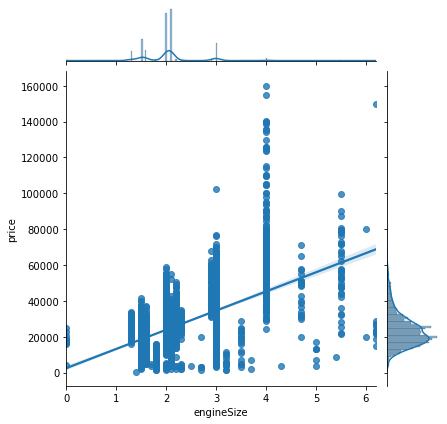

In [73]:
import seaborn as sns
sns.jointplot(x="engineSize",y="price",data=data,kind="reg")

In [74]:
from sklearn.linear_model import LinearRegression
X=data[["engineSize"]]
X.head()

,engineSize
0,1.8
1,2.1
2,5.5
3,4.0
4,4.0


In [30]:
y=data[["price"]]
y.head()

,price
0,5200
1,34948
2,49948
3,61948
4,73948


In [75]:
reg=LinearRegression()
model=reg.fit(X,y)

In [76]:
model

LinearRegression()

In [77]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [78]:
model.intercept_

array([2579.00260034])

In [79]:
model.coef_

array([[10677.90280855]])

In [80]:
model.score(X,y)

0.2663858193529457

C:\Users\tugce\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'motor boyutu')

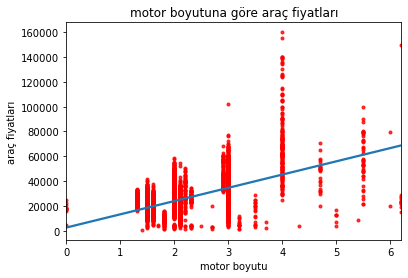

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
g=sns.regplot(data["engineSize"],data["price"],ci=None,scatter_kws={'color':'r','s':9})
g.set_title("motor boyutuna göre araç fiyatları")
g.set_ylabel("araç fiyatları")
g.set_xlabel("motor boyutu")


In [84]:
model.predict([[2]])

array([[23934.80821743]])

In [90]:
tahmin_edilen_y=pd.DataFrame(model.predict(X)[0:10])

In [91]:
gercek_y=y[0:10]

In [92]:
hatalar=pd.concat([gercek_y,tahmin_edilen_y],axis=1)

In [93]:
hatalar.columns=["gercek_y","tahmin_edilen_y"]

In [94]:
hatalar

,gercek_y,tahmin_edilen_y
0,5200,21799.227656
1,34948,25002.598498
2,49948,61307.468047
3,61948,45290.613835
4,73948,45290.613835
5,149948,68782.000013
6,30948,25002.598498
7,10948,39951.662430
8,139948,45290.613835
9,19750,25002.598498


In [95]:
hatalar["hata"]=hatalar["gercek_y"]-hatalar["tahmin_edilen_y"]

In [96]:
hatalar

,gercek_y,tahmin_edilen_y,hata
0,5200,21799.227656,-16599.227656
1,34948,25002.598498,9945.401502
2,49948,61307.468047,-11359.468047
3,61948,45290.613835,16657.386165
4,73948,45290.613835,28657.386165
5,149948,68782.000013,81165.999987
6,30948,25002.598498,5945.401502
7,10948,39951.662430,-29003.662430
8,139948,45290.613835,94657.386165
9,19750,25002.598498,-5252.598498


In [97]:
hatalar["hata_kareler"]=hatalar["hata"]**2

In [99]:
hatalar

,gercek_y,tahmin_edilen_y,hata,hata_kareler
0,5200,21799.227656,-16599.227656,2.755344e+08
1,34948,25002.598498,9945.401502,9.891101e+07
2,49948,61307.468047,-11359.468047,1.290375e+08
3,61948,45290.613835,16657.386165,2.774685e+08
4,73948,45290.613835,28657.386165,8.212458e+08
5,149948,68782.000013,81165.999987,6.587920e+09
6,30948,25002.598498,5945.401502,3.534780e+07
7,10948,39951.662430,-29003.662430,8.412124e+08
8,139948,45290.613835,94657.386165,8.960021e+09
9,19750,25002.598498,-5252.598498,2.758979e+07


In [100]:
import numpy as np
np.mean(hatalar["hata_kareler"])

1805428751.3704822